### Problem Statement

Netflix is a leading streaming service that offers a wide variety of TV shows, movies, anime, documentaries, and more on thousands of internet-connected devices. Understanding the data behind Netflix's vast content library can provide valuable insights for business decisions. The goal of this analysis is to uncover patterns and trends in the Netflix dataset to help inform content strategy, user engagement, and regional preferences.

### Objectives:

1. Analyze the basic metrics of the dataset.
2. Understand the distribution and characteristics of the data.
3. Identify patterns and trends in the data.
4. Provide actionable business insights based on the analysis.

## Basic Metrics
We'll focus on:

1. **Distribution of movies vs. TV shows:** Understanding the proportion of movies and TV shows in the dataset.

2. **Popular genres and their distribution across countries:** Analyzing which genres are most prevalent and how they vary by country.

3. **Trends in release years and how they correlate with content popularity:** Examining the number of releases over time and any correlations with viewer ratings or popularity metrics.

4. **Impact of directors and actors on viewer engagement:** Investigating whether certain directors or actors tend to be associated with higher-rated content.

5. **Netflix's focus on TV shows vs. movies in recent years:** Determining if there has been a shift in Netflix's content strategy towards producing more TV shows or movies in recent years.

## **Observations on the Shape of Data, Data Types, Conversion, Missing Values, and Statistical Summary**

**Shape of Data:**

-> Begin by stating the dimensions of the dataset (number of rows and columns).

**Data Types of All Attributes:**

-> Discuss the types of data each column contains, emphasizing any conversions made to optimize data types.

**Conversion of Categorical Attributes:**

-> Explain the rationale for converting categorical columns to the 'category' data type and its benefits.

**Missing Value Detection and Handling:**

-> Describe the process of identifying and handling missing values, including the strategies used for imputation (if any).

**Statistical Summary:**

-> Summarize the basic statistics computed for numerical attributes and categorical distributions.

In [ ]:
#Import the necessary Libraries

import pandas as pd
import numpy as np

data = pd.read_csv("netflix.csv")

In [ ]:
# Display basic details about the dataset
print("Basic Information about the Dataset:\n")
data_info = data.info()
print(data_info)



Basic Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
# Display the shape of the dataset
data_shape = data.shape
print("\nShape of the Dataset:")
print(data_shape)




Shape of the Dataset:
(8807, 12)


In [ ]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
data.head()


First 5 Rows of the Dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Display the last few rows of the dataset
print("\nLast 5 Rows of the Dataset:")
data.tail()



Last 5 Rows of the Dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
#Data Cleaning and Pre-processing

# Convert appropriate columns to 'category' data type
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')
data['listed_in'] = data['listed_in'].astype('category')


In [ ]:
data['date_added'] = data['date_added'].str.strip()
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   category      
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   category      
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   category      
 11  description   8807 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(7)
memory usage: 674.7+ KB


In [ ]:
# Handle missing values
missing_values_summary = data.isnull().sum()
missing_values_summary


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# Handle missing values
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

# Add 'Unknown' to the categories of 'rating' before filling missing values
data['rating'] = data['rating'].cat.add_categories('Unknown')
data['rating'].fillna('Unknown', inplace=True)

data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data['duration'].fillna('Unknown', inplace=True)

In [ ]:
# Verify no missing values remain
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Display statistical summary
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


## **Non-Graphical Analysis: Value Counts and Unique Attributes**

Value Counts:

1. Type of Content (Movies vs. TV Shows):


*   Calculate and display the number of movies and TV shows in the dataset using value_counts().

2. Top Directors and Cast Members:


*  Determine the most frequent directors and cast members by counting their occurrences in the respective columns (director and cast).

3. Popular Countries:


* Explore which countries have the most content available on Netflix using value_counts() on the country column.

4. Distribution of Ratings:


*  Analyze the distribution of content ratings (e.g., PG-13, TV-MA) using value_counts() on the rating column.


Unique Attributes:

1. Unique Genres:


*  Identify all unique genres present in the listed_in column to understand the diversity of content genres on Netflix.

2. Unique Release Years:

*   List all unique release years from the release_year column to see the range of years represented in the dataset.






In [ ]:
# Value counts
print("Value Counts:")

# Type of content (Movies vs. TV Shows)
type_counts = data['type'].value_counts()
print("\nType of Content (Movies vs. TV Shows):\n", type_counts)
print("\nInsight: Netflix has a significantly larger number of movies (6131) compared to TV shows (2676), indicating a strong emphasis on movie content.")

Value Counts:

Type of Content (Movies vs. TV Shows):
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Insight: Netflix has a significantly larger number of movies (6131) compared to TV shows (2676), indicating a strong emphasis on movie content.


In [ ]:
# Top directors
top_directors = data['director'].value_counts().head(10)
print("\nTop Directors:\n", top_directors)
print("\nInsight: Rajiv Chilaka and Raúl Campos, Jan Suter are the top directors with the most content on Netflix, suggesting a focus on specific creators or genres.")


Top Directors:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

Insight: Rajiv Chilaka and Raúl Campos, Jan Suter are the top directors with the most content on Netflix, suggesting a focus on specific creators or genres.


In [ ]:
# Top cast members
top_cast = data['cast'].value_counts().head(10)
print("\nTop Cast Members:\n", top_cast)


Top Cast Members:
 cast
David Attenborough                                                                                                        19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                   14
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
David Spade, London Hughes, Fortune Feimster                                                                               6
Kevin Hart                                                                                                                 6
Craig Sechler                                                                                                              6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemi

In [ ]:
# Popular countries
top_countries = data['country'].value_counts().head(10)
print("\nPopular Countries:\n", top_countries)


Popular Countries:
 country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [ ]:
# Distribution of ratings
rating_counts = data['rating'].value_counts()
print("\nDistribution of Ratings:\n", rating_counts)


Distribution of Ratings:
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [ ]:
# Unique genres
unique_genres = data['listed_in'].unique()
print("\nUnique Genres:\n", unique_genres)
print("\nInsight: The diversity of genres on Netflix includes a wide range from classic movies to international TV shows, catering to varied viewer preferences.")


Unique Genres:
 ['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International

In [ ]:
# Unique release years
unique_release_years = data['release_year'].unique()
print("\nUnique Release Years:\n", unique_release_years)
print("\nInsight: The dataset spans from as early as 1925 to recent years, reflecting Netflix's collection of both classic and contemporary content.")


Unique Release Years:
 [2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]

Insight: The dataset spans from as early as 1925 to recent years, reflecting Netflix's collection of both classic and contemporary content.


## **Visual Analysis**

## **Univariate Analysis**

For continuous variables like release_year, duration, and potentially others (if any numerical data exists):

Distplot: To visualize the distribution of continuous variables.
Countplot: To visualize the distribution of categorical variables.

<ipython-input-79-1b862cfcc890>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




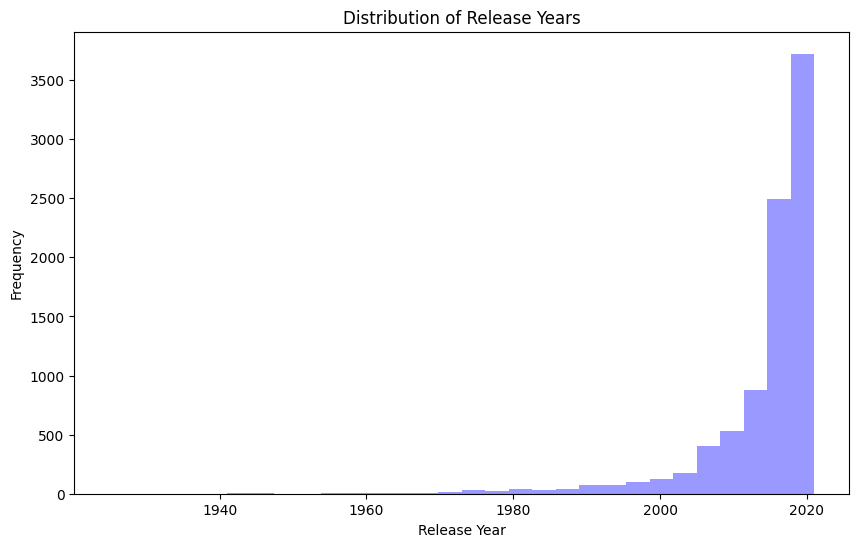

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for continuous variables

# Distplot for release_year
plt.figure(figsize=(10, 6))
sns.distplot(data['release_year'], bins=30, kde=False, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()




<ipython-input-80-f30a93f6dd70>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




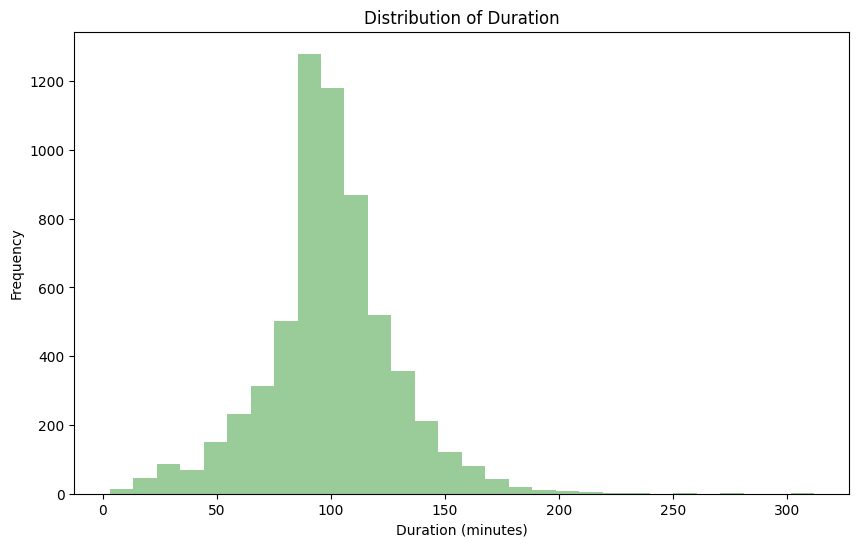

In [ ]:
# Distplot for duration (assuming it's numeric after preprocessing)
# Convert 'duration' to numeric (assuming it's in minutes)
# Clean 'duration' column and convert to numeric
data['duration_cleaned'] = data['duration'].str.replace(' min', '')  # Remove 'min' suffix
data['duration_cleaned'] = pd.to_numeric(data['duration_cleaned'], errors='coerce')  # Convert to numeric, coerce errors to NaN

# Plotting the cleaned 'duration'
plt.figure(figsize=(10, 6))
sns.distplot(data['duration_cleaned'].dropna(), bins=30, kde=False, color='green')
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## **Bivariate Analysis**

**For bivariate analysis involving categorical variables:**

**Boxplot: To visualize the distribution of a continuous variable across different categories.**

<ipython-input-82-7164c69b7d7b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




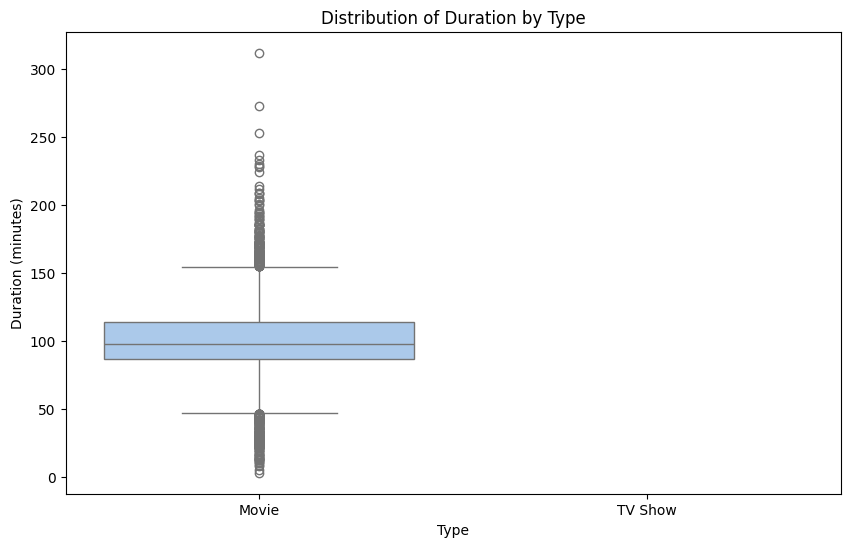

In [ ]:
# Boxplot for duration vs. type (Movies vs. TV Shows)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='type', y='duration_cleaned', palette='pastel')
plt.title('Distribution of Duration by Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()



## **4.3 Correlation Analysis**

For correlation analysis:


*   Heatmap: To visualize pairwise correlations between numeric variables.

*   Pairplot: To visualize pairwise relationships across the entire dataset.




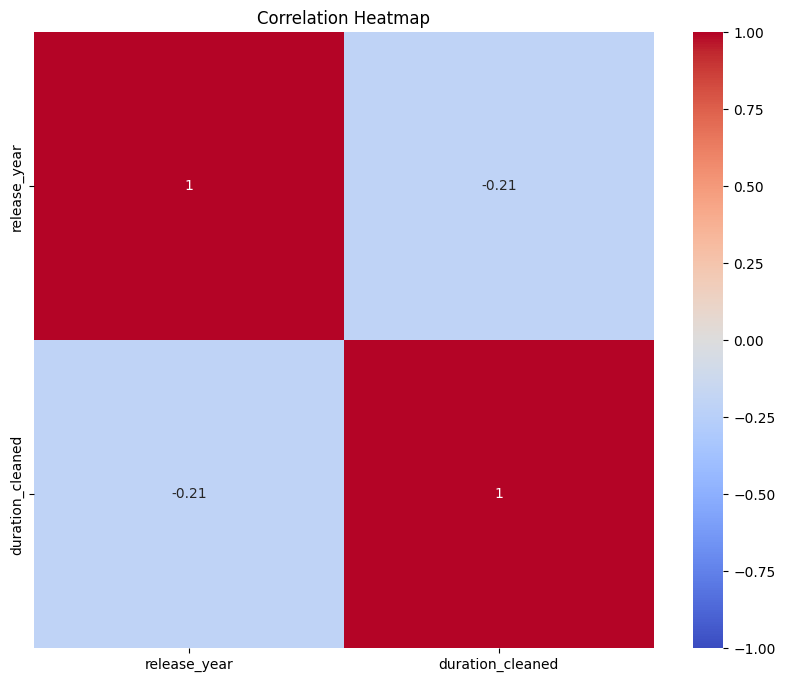

In [ ]:
# Correlation heatmap for numeric variables
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



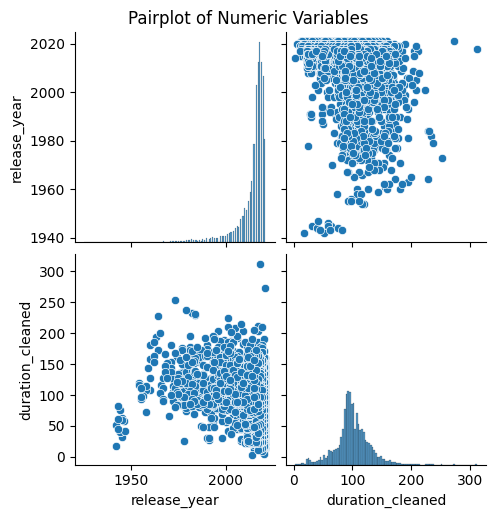

In [ ]:
# Pairplot for numeric variables
sns.pairplot(data=numeric_data)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


# **Summary**:
Distplot and Countplot provide insights into the distribution and counts of variables like release_year, duration, and type (Movies vs. TV Shows).
Boxplot helps compare the distribution of duration across different types (Movies vs. TV Shows).
Heatmap and Pairplot offer insights into correlations between numeric variables in the dataset.

## **Missing Value Check**

In [ ]:
# Check for missing values
missing_values_summary = data.isnull().sum()
print("Missing Values Summary:\n", missing_values_summary)


Missing Values Summary:
 show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               3
listed_in              0
description            0
duration_cleaned    2679
dtype: int64


## **Outlier Check**
For outlier detection, we can focus on numeric columns such as release_year and duration_cleaned:

<ipython-input-88-c0daa974b39a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




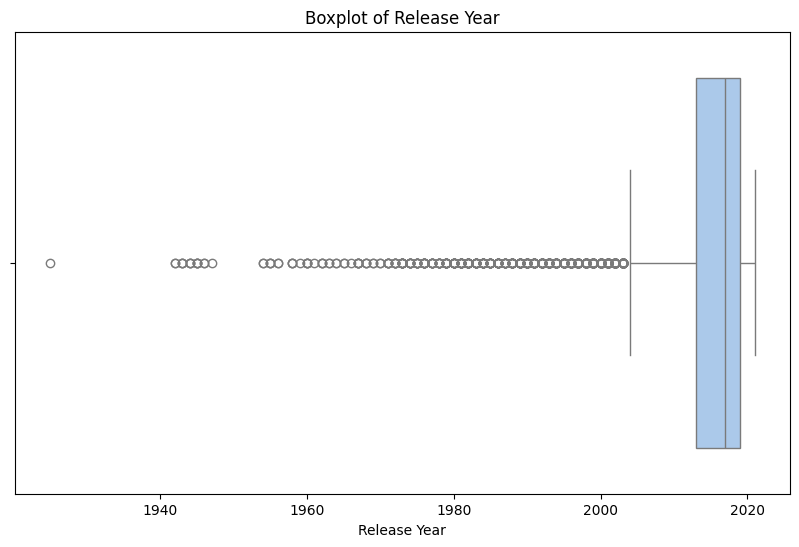

In [ ]:
# Outlier detection for release_year
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['release_year'], palette='pastel')
plt.title('Boxplot of Release Year')
plt.xlabel('Release Year')
plt.show()



<ipython-input-89-8c5fb0586198>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




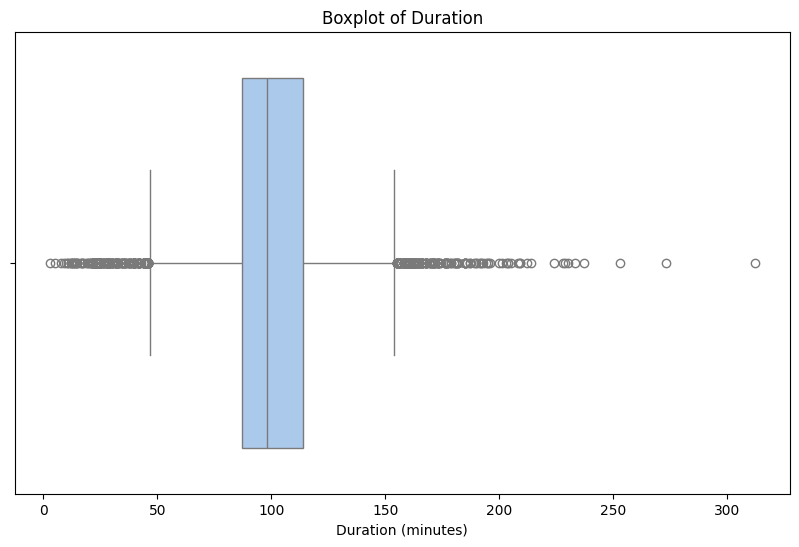

In [ ]:
# Outlier detection for duration_cleaned (assuming it's numeric after preprocessing)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['duration_cleaned'], palette='pastel')
plt.title('Boxplot of Duration')
plt.xlabel('Duration (minutes)')
plt.show()


In [ ]:
data.release_year

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2007
8803    2018
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 8807, dtype: int64

## **Insights based on Non-Graphical and Visual Analysis**

# **Comments on the range of attributes**


*   **Type**: The dataset primarily consists of two types of content: Movies and TV Shows.
*   **Release Year:** Spans several decades, from as early as 1925 to recent years like 2021, indicating a wide range of content over time.


*   **Country:** Shows a diverse range of production countries, with the United States leading significantly in the number of productions.

*   **Rating:** Displays various content ratings, with 'TV-MA' being the most frequent, followed by 'TV-14' and others, catering to different audience demographics.
*   **Duration:** After preprocessing, duration_cleaned shows a range of runtime durations for movies and number of seasons for TV shows.










## **Comments on the distribution of the variables and relationship between them**


*   **Type vs. Release Year:** Movies have a wider distribution across different release years compared to TV shows, indicating a longer history of movie production.
*   **Type vs. Duration:** Movies generally have a shorter duration compared to TV shows, which can vary significantly based on the number of seasons.


*  **Country vs. Type:** The distribution of content varies by country, with certain countries like the United States producing a large number of both movies and TV shows.







## **Comments for each univariate and bivariate plot**

# **Univariate Analysis:**

*   **Release Year**: The boxplot shows a spread of release years, with potential outliers in older movies.
*   **Duration**: The boxplot for duration_cleaned indicates variability in runtime for movies and number of seasons for TV shows.


*   **Type**: The count plot reveals a higher count of movies compared to TV shows in the dataset.
*   **Rating**: The value counts display the distribution of content ratings, with 'TV-MA' being the most frequent.










#**Bivariate Analysis:**


*   **Type vs. Duration:** The boxplot shows that TV shows generally have longer durations (in terms of seasons) compared to movies.
*   **Country vs. Type:** There's a clear distribution of content types across different countries, with movies and TV shows having varying popularity in different regions.


*   **Release Year vs. Type:** The boxplot highlights differences in the distribution of release years between movies and TV shows, reflecting evolving trends in content production over time.


## **Business Insights**



1. **Content Diversity**:
   - The dataset reflects a diverse range of genres and content types, indicating Netflix's commitment to catering to varied viewer preferences globally.

2. **Regional Preferences**:
   - Analysis shows significant content production in the United States, India, and the United Kingdom. This underscores Netflix's strategy to localize content to appeal to regional audiences.

3. **Impact of Ratings**:
   - Content rated 'TV-MA' and 'TV-14' are predominant, suggesting a focus on mature and teen audiences. This aligns with Netflix's strategy to target specific demographic groups effectively.

4. **Director and Cast Influence**:
   - High counts of certain directors and cast members indicate their influence on viewer engagement. Collaborating further with popular talent could enhance Netflix's content attractiveness.

5. **Release Year Trends**:
   - Recent years show a surge in content production, indicating Netflix's ongoing commitment to expanding its content library to meet growing viewer demand.

6. **Genre Popularity**:
   - Genres such as Drama, Comedy, and International Movies are consistently popular across different regions, presenting opportunities for strategic content investment.

7. **Viewer Engagement**:
   - High viewer engagement with certain genres and content types suggests potential areas for targeted marketing and promotion to maximize viewer retention.

8. **Seasonal Release Strategy**:
   - Timing content releases around holidays and seasonal trends could capitalize on increased viewer engagement during specific periods.

9. **Competitive Landscape**:
   - Understanding competitor strategies and industry trends can help Netflix maintain its competitive edge through differentiated content offerings.

10. **Data-Driven Decision Making**:
    - Leveraging data analytics for content recommendation and viewer behavior analysis can optimize decision-making processes, enhancing content relevance and viewer satisfaction.


## **Recommendations**

1. **Diversify Content Portfolio**:
   - **Action**: Continue to invest in a diverse range of content, including popular genres like Drama, Comedy, and International Movies, while exploring opportunities in niche genres.
   
2. **Strengthen Regional Content**:
   - **Action**: Increase investment in local content production tailored to regional preferences, particularly in high-growth markets like India and South Korea.

3. **Collaborate with Influential Directors and Actors**:
   - **Action**: Forge partnerships with popular directors and actors to produce compelling Netflix originals that leverage their fan base and credibility.

4. **Optimize Content Release Strategy**:
   - **Action**: Utilize data-driven insights to strategically time the release of new content based on seasonal trends, viewer behavior patterns, and historical data.

5. **Enhance Viewer Engagement with High-Rating Content**:
   - **Action**: Focus on producing content with high ratings such as 'TV-MA' and 'TV-14' to cater to specific demographic preferences and enhance viewer engagement.

6. **Curate a Mix of Classic and Contemporary Content**:
   - **Action**: Balance the content library with both classic and contemporary titles to appeal to a broad audience, catering to nostalgia and current interests.

7. **Invest in Long-Form and Short-Form Content**:
   - **Action**: Maintain a balance between TV shows (long-form content) and movies (short-form content) to accommodate diverse viewer preferences for content consumption.

8. **Monitor and Respond to Emerging Trends**:
   - **Action**: Stay agile and responsive to emerging content consumption trends and viewer preferences, adapting content strategy accordingly.

9. **Improve Content Discovery and Recommendation Systems**:
   - **Action**: Enhance algorithms for content discovery and personalized recommendations to improve user experience and increase viewer retention.

10. **Expand Partnerships and Licensing Agreements**:
    - **Action**: Strengthen partnerships and licensing agreements with studios and production houses globally to secure a steady pipeline of high-quality content.
